<a href="https://colab.research.google.com/github/PabloCGarcia/bioDeepLearning/blob/main/Clase06_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:36
🔁 Restarting kernel...


In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
!conda install -c conda-forge rdkit

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.74.0               |   py36h355b2fd_3         340 KB  conda-forge
    boost-cpp-1.74.0           |       h9d3c048_1        16.3 MB  conda-forge
    cairo-1.16.0               |    h7979940_1007         1.5 MB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    cycler-0.10.0              |             py_2           9 KB  conda-forge
    fontconfig-2.13.1          |    hba837de_1004         344 KB  conda-forge
    freetype-2.10.4            |       h0708190_1         890 KB  conda-forge
    gettext-0.19.8.1           |    h0b5b191_1005         3.

In [3]:
from rdkit import Chem

In [4]:
m = Chem.MolFromSmiles('CC[C@H](F)Cl')
print(m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl')))
print(m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl')))
print(m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl')))


True
True
True


In [5]:
m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'))
m2 = Chem.MolFromSmiles('CCC(F)Cl')
m2.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'),useChirality=True)

False

In [6]:
m = Chem.MolFromSmiles('C2NCC2CC1C(CCCC)C(OCCCC)C1c2ccccc2')
p = Chem.MolFromSmarts('C1CCC1*')
p.GetAtomWithIdx(4).SetProp("queryType", "all_carbon")
m.GetSubstructMatches(p)

((5, 6, 11, 17, 18), (5, 17, 11, 6, 7), (6, 5, 17, 11, 12), (6, 11, 17, 5, 4))

In [7]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")
mols = [mol1,mol2,mol3]
res=rdFMCS.FindMCS(mols)
#res.numAtoms
#res.numBonds
res.smartsString

'[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]'

Fingerprints


In [9]:
from rdkit import DataStructs
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'),Chem.MolFromSmiles('COC')]
fps = [Chem.RDKFingerprint(x) for x in ms]
DataStructs.FingerprintSimilarity(fps[0],fps[1])
DataStructs.FingerprintSimilarity(fps[0],fps[2])
DataStructs.FingerprintSimilarity(fps[1],fps[2])

0.25

In [12]:
DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.DiceSimilarity)

0.6666666666666666

In [13]:
from rdkit.Chem import MACCSkeys
fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]
DataStructs.FingerprintSimilarity(fps[0],fps[1])
DataStructs.FingerprintSimilarity(fps[0],fps[2])
DataStructs.FingerprintSimilarity(fps[1],fps[2])


0.21428571428571427

In [14]:
from rdkit.Chem.AtomPairs import Pairs
ms = [Chem.MolFromSmiles('C1CCC1OCC'),Chem.MolFromSmiles('CC(C)OCC'),Chem.MolFromSmiles('CCOCC')]
pairFps = [Pairs.GetAtomPairFingerprint(x) for x in ms]

In [15]:
from rdkit import DataStructs
DataStructs.DiceSimilarity(pairFps[0],pairFps[1])
DataStructs.DiceSimilarity(pairFps[0],pairFps[2])
DataStructs.DiceSimilarity(pairFps[1],pairFps[2])

0.56

In [16]:
from rdkit.Chem.AtomPairs import Torsions
tts = [Torsions.GetTopologicalTorsionFingerprintAsIntVect(x) for x in ms]
DataStructs.DiceSimilarity(tts[0],tts[1])

0.16666666666666666

In [18]:
from rdkit.Chem import AllChem
m1 = Chem.MolFromSmiles('Cc1ccccc1')
fp1 = AllChem.GetMorganFingerprint(m1,2)
m2 = Chem.MolFromSmiles('Cc1ncccc1')
fp2 = AllChem.GetMorganFingerprint(m2,2)
DataStructs.DiceSimilarity(fp1,fp2)

0.55

In [19]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,2,nBits=1024)
fp2 = AllChem.GetMorganFingerprintAsBitVect(m2,2,nBits=1024)
DataStructs.DiceSimilarity(fp1,fp2)

0.5185185185185185

In [20]:
m1 = Chem.MolFromSmiles('c1ccccn1')
m2 = Chem.MolFromSmiles('c1ccco1')
fp1 = AllChem.GetMorganFingerprint(m1,2)
fp2 = AllChem.GetMorganFingerprint(m2,2)
ffp1 = AllChem.GetMorganFingerprint(m1,2,useFeatures=True)
ffp2 = AllChem.GetMorganFingerprint(m2,2,useFeatures=True)
DataStructs.DiceSimilarity(fp1,fp2)
DataStructs.DiceSimilarity(ffp1,ffp2)


0.9090909090909091

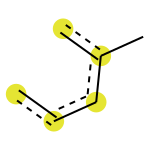

In [21]:
from IPython.display import SVG
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)
SVG(rdk_svg)

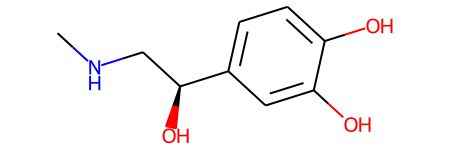

In [22]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole


epinephrine = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1')
epinephrine

In [23]:
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(epinephrine, radius=2, bitInfo=bi)
# show 10 of the set bits:
list(fp.GetOnBits())[:10]

[1, 80, 227, 315, 589, 606, 632, 807, 875, 1057]

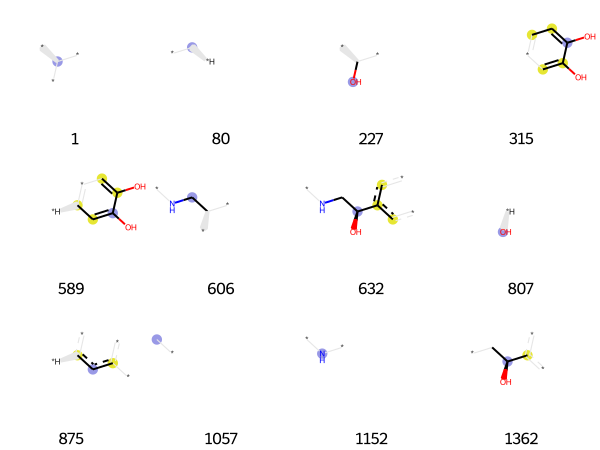

In [24]:
tpls = [(epinephrine,x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(tpls[:12],molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()][:12])

In [25]:

from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))

In [26]:

interact(renderFpBit, bitIdx=list(bi.keys()),mol=fixed(epinephrine),
         bitInfo=fixed(bi),fn=fixed(Draw.DrawMorganBit));

interactive(children=(Dropdown(description='bitIdx', options=(1, 80, 227, 315, 589, 606, 632, 807, 875, 1057, …

In [27]:

rdkbi = {}
rdkfp = Chem.RDKFingerprint(epinephrine, maxPath=5, bitInfo=rdkbi)
# show 10 of the set bits:
list(rdkfp.GetOnBits())[:10]

[93, 103, 112, 122, 148, 149, 161, 166, 194, 208]

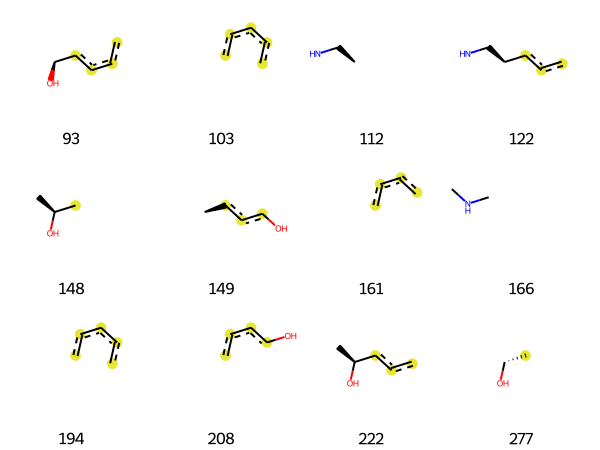

In [28]:
tpls = [(epinephrine,x,rdkbi) for x in rdkbi]
Draw.DrawRDKitBits(tpls[:12],molsPerRow=4,legends=[str(x) for x in rdkbi][:12])

In [29]:
interact(renderFpBit, bitIdx=list(rdkbi.keys()),mol=fixed(epinephrine),
         bitInfo=fixed(rdkbi),fn=fixed(Draw.DrawRDKitBit));

interactive(children=(Dropdown(description='bitIdx', options=(93, 103, 112, 122, 148, 149, 161, 166, 194, 208,…

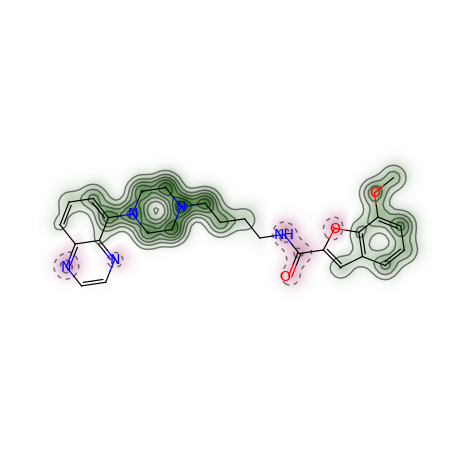

In [30]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

In [ ]:
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
Descriptors.TPSA(m)
Descriptors.MolLogP(m)

1.3848

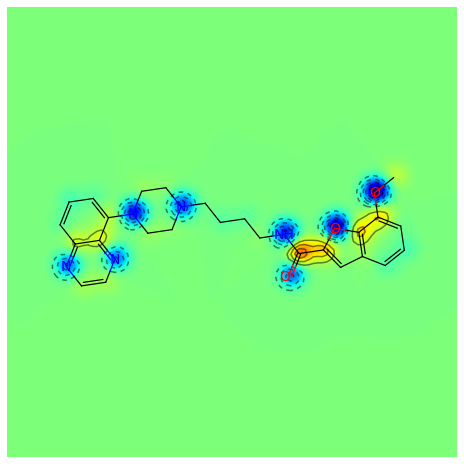

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

In [ ]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
ps = rxn.RunReactants((Chem.MolFromSmiles('CC(=O)O'),Chem.MolFromSmiles('NC')))
len(ps)
Chem.MolToSmiles(ps[0][0])
ps = rxn.RunReactants((Chem.MolFromSmiles('C(COC(=O)O)C(=O)O'),Chem.MolFromSmiles('NC')))
len(ps)
Chem.MolToSmiles(ps[0][0])
Chem.MolToSmiles(ps[1][0])


'CNC(=O)CCOC(=O)O'

In [ ]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [ ]:
m = Chem.MolFromSmiles('OCc1ccccc1CN')
feats = factory.GetFeaturesForMol(m)
len(feats)

8

In [ ]:
feats[0].GetFamily()
feats[0].GetType()
feats[0].GetAtomIds()
feats[4].GetFamily()
feats[4].GetAtomIds()

(2, 3, 4, 5, 6, 7)